In [27]:
import pandas as pd

# Load your dataset
df = pd.read_csv(r"C:\sql images\ipl_colab.csv")

# Preview data
df.head()


,mid,date,venue,batting_team,bowling_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [29]:
# Keep only useful columns
df = df[['batting_team', 'bowling_team', 'venue', 'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

# Drop rows with missing values
df = df.dropna()

# Filter for records after 5 overs
df = df[df['overs'] >= 5]
df

,batting_team,bowling_team,venue,overs,runs,wickets,runs_last_5,wickets_last_5,total
32,Kolkata Knight Riders,Royal Challengers Bangalore,M Chinnaswamy Stadium,5.1,61,0,59,0,222
33,Kolkata Knight Riders,Royal Challengers Bangalore,M Chinnaswamy Stadium,5.2,61,1,59,1,222
34,Kolkata Knight Riders,Royal Challengers Bangalore,M Chinnaswamy Stadium,5.3,61,1,59,1,222
35,Kolkata Knight Riders,Royal Challengers Bangalore,M Chinnaswamy Stadium,5.4,61,1,59,1,222
36,Kolkata Knight Riders,Royal Challengers Bangalore,M Chinnaswamy Stadium,5.5,61,1,58,1,222
...,...,...,...,...,...,...,...,...,...
76009,Mumbai Indians,Rising Pune Supergiant,"Rajiv Gandhi International Stadium, Uppal",19.2,121,7,40,0,129
76010,Mumbai Indians,Rising Pune Supergiant,"Rajiv Gandhi International Stadium, Uppal",19.3,127,7,46,0,129
76011,Mumbai Indians,Rising Pune Supergiant,"Rajiv Gandhi International Stadium, Uppal",19.4,128,7,47,0,129
76012,Mumbai Indians,Rising Pune Supergiant,"Rajiv Gandhi International Stadium, Uppal",19.5,129,7,48,0,129


In [30]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['batting_team', 'bowling_team', 'venue']
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le


In [31]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='total')
y = df['total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train & evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name} MAE: {mae:.2f}")


Linear Regression MAE: 13.15
Random Forest MAE: 3.69
Gradient Boosting MAE: 12.57


In [34]:
# Sample input after 10 overs
sample_input = pd.DataFrame([{
    'batting_team': encoders['batting_team'].transform(['Chennai Super Kings'])[0],
    'bowling_team': encoders['bowling_team'].transform(['Mumbai Indians'])[0],
    'venue': encoders['venue'].transform(['Wankhede Stadium'])[0],
    'overs': 10,
    'runs': 82,
    'wickets': 2,
    'runs_last_5': 45,
    'wickets_last_5': 1
}])

# Use best model
best_model = models['Gradient Boosting']
predicted_score = best_model.predict(sample_input)[0]

print(f"🏏 Predicted Final Score: {round(predicted_score)}")


🏏 Predicted Final Score: 174


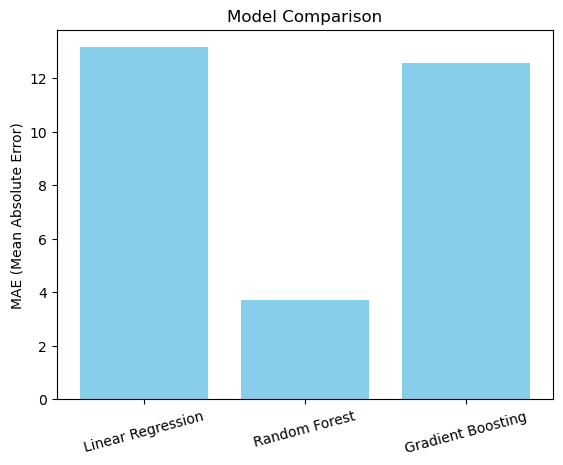

In [38]:
import matplotlib.pyplot as plt

mae_scores = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    mae_scores[name] = mean_absolute_error(y_test, y_pred)

# Plot
plt.bar(mae_scores.keys(), mae_scores.values(), color='skyblue')
plt.ylabel("MAE (Mean Absolute Error)")
plt.title("Model Comparison")
plt.xticks(rotation=15)
plt.show()
